In [169]:
%matplotlib inline

import numpy as np
from sklearn import decomposition
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn import preprocessing

In [170]:
# no of PCA dimensions
n_dims = 3

iris = datasets.load_iris()
x = iris.data[:, :n_dims+1]
y = iris.target

In [171]:
# normalize the data
dist = x.max(axis=0) - x.min(axis=0)
x_norm = (x - x.mean(axis=0))/dist

In [172]:
# transforming classes to values
LE = preprocessing.LabelEncoder()
LE.fit(y)
y = LE.transform(y)

In [173]:
x_without_pca = x_norm[:,:n_dims]

# fiiting the data for logistic regression
model = linear_model.LogisticRegression()
model.fit(x_without_pca, y)

# predict evaluation
y_predict = model.predict(x_without_pca)
accuracy = metrics.accuracy_score(y, y_predict)
print "Accuracy Score without PCA and {0} dimensions = {1}%".format(n_dims, accuracy*100)

Accuracy Score without PCA and 3 dimensions = 82.0%


In [174]:
pca_model = decomposition.PCA(n_dims)
pca_model.fit(x_norm)
x_transformed = pca_model.transform(x_norm)

Accuracy Score with PCA and 3 dimensions = 88.6666666667%


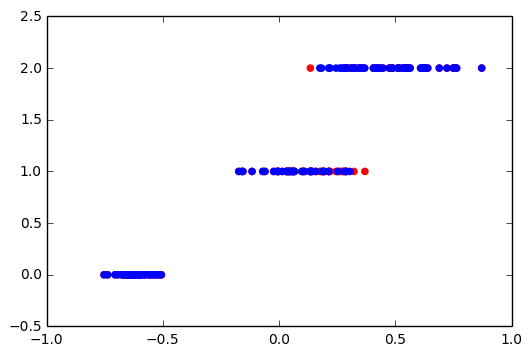

In [175]:
# fiiting the data for logistic regression
model = linear_model.LogisticRegression()
model.fit(x_transformed, y)

# predict evaluation
y_predict = model.predict(x_transformed)
accuracy = metrics.accuracy_score(y, y_predict)
print "Accuracy Score with PCA and {0} dimensions = {1}%".format(n_dims, accuracy*100)

# visualize the results
plt.scatter(x_transformed[:,0], y, color='red')
plt.scatter(x_transformed[:,0], y_predict, color='blue')
plt.show()